So far
> Looking at comments from May 2015
> Authors are not known bots
> The subreddit has more than 10,000 authors

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [44]:
# query = """SELECT RANK() OVER(ORDER BY count DESC) rank, count, comment, avg_score, count_subs, count_authors, example_id 
# FROM (
#   SELECT comment, COUNT(*) count, AVG(avg_score) avg_score, COUNT(UNIQUE(subs)) count_subs, COUNT(UNIQUE(author)) count_authors, FIRST(example_id) example_id
#   FROM (
#     SELECT body comment, author, AVG(score) avg_score, UNIQUE(subreddit) subs, FIRST('http://reddit.com/r/'+subreddit+'/comments/'+REGEXP_REPLACE(link_id, 't[0-9]_','')+'/c/'+id) example_id
#     FROM [fh-bigquery:reddit_comments.2015_05]
#     WHERE author NOT IN (SELECT author FROM [fh-bigquery:reddit_comments.bots_201505])
#     AND subreddit IN (SELECT subreddit FROM [fh-bigquery:reddit_comments.subr_rank_201505] WHERE authors>10000)
#     GROUP EACH BY 1, 2
#   )
#   GROUP EACH BY 1
#   ORDER BY 2 DESC
#   LIMIT 300
# )"""

# query = """
# SELECT RANK() OVER(ORDER BY count DESC) rank, count, comment, gilded, avg_score, count_subs, count_authors, example_id 
# FROM (
#   SELECT comment, COUNT(*) count, AVG(avg_score) avg_score, COUNT(UNIQUE(subs)) count_subs, COUNT(UNIQUE(author)) count_authors, FIRST(example_id) example_id
#   FROM (
#     SELECT body comment, author, AVG(score) avg_score,  UNIQUE(subreddit) subs, FIRST('http://reddit.com/r/'+subreddit+'/comments/'+REGEXP_REPLACE(link_id, 't[0-9]_','')+'/c/'+id) example_id
#     FROM [fh-bigquery:reddit_comments.2015_05]
#     WHERE author NOT IN (SELECT author FROM [fh-bigquery:reddit_comments.bots_201505])
#     AND subreddit IN (SELECT subreddit FROM [fh-bigquery:reddit_comments.subr_rank_201505] WHERE authors>10000)
#     GROUP EACH BY 1, 2
#   )
#   GROUP EACH BY 1
#   ORDER BY 2 DESC
#   LIMIT 300
# )
# """

query = """
SELECT subreddit, body, controversiality, gilded, score, ups, downs
 FROM [fh-bigquery:reddit_comments.2014] 
 WHERE author NOT IN (SELECT author FROM [fh-bigquery:reddit_comments.bots_201505])
 LIMIT 10000
"""
raw_sample_data = pd.read_gbq(query, project_id="reddit-with-bigquery-in-class")

Requesting query... ok.
Query running...
Query done.
Processed: 115.2 Gb

Retrieving results...
Got 10000 rows.

Total time taken 4.72 s.
Finished at 2017-02-10 12:27:24.


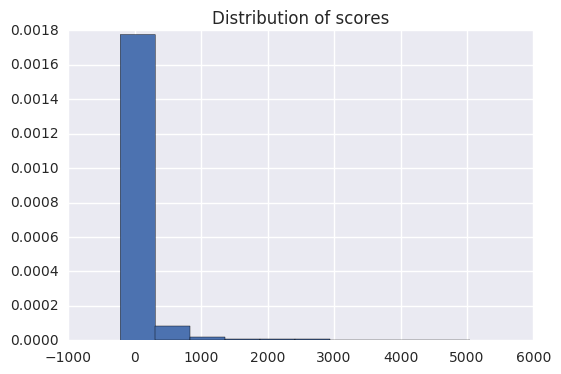

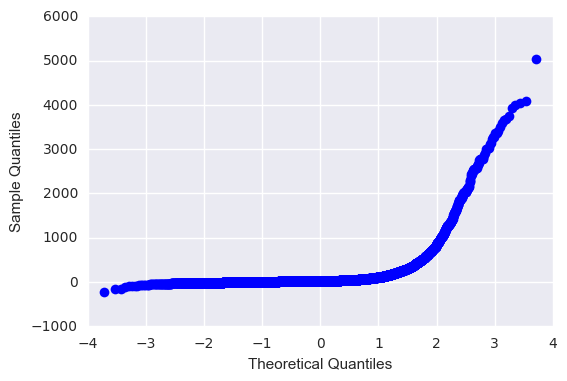

In [49]:
sample_data = raw_sample_data.copy()
sample_data["score"].hist(normed = True)
plt.title("Distribution of scores")
plt.show()

qqplot(raw_sample_data["score"])
plt.show()

> Controversial looks at two things: the number of votes that a post gets, and how evenly split they are. To score highly on controversial a post needs both.

In [50]:
# raw_sample_data.to_csv("/Users/Nathan/Desktop/PuzzleAndDragons_subreddit_sample.csv")

In [51]:
sample_data["body length"] = sample_data["body"].apply(lambda x: len(x))

In [52]:
# sns.pairplot(sample_data)
# plt.show()

In [53]:
sample_data["downs"].value_counts()

0    10000
Name: downs, dtype: int64

In [54]:
sample_data

,subreddit,body,controversiality,gilded,score,ups,downs,body length
0,nsfw,NSA spying = so bad!! private images of attrac...,0,0,-4,-4,0,101
1,nsfw,too big,0,0,-3,-3,0,7
2,nsfw,I'm just noicing your noice!,1,0,15,15,0,28
3,nsfw,[moar](http://fineartteens.com/gallery/tess_co...,0,0,18,18,0,56
4,nsfw,"No, her name is Autumn Moretti, not Christ.",0,0,17,17,0,43
5,nsfw,"That looks like it feels real, real good.",0,0,342,342,0,42
6,nsfw,She must be like... what... 50 now?,0,0,-4,-4,0,35
7,nsfw,That's the worst part. The fact that they wast...,0,0,14,14,0,94
8,nsfw,"What?! You should have known, Mack Maine predi...",0,0,149,149,0,153
9,nsfw,"I was doing molly with this girl a year ago, a...",0,0,36,36,0,106
